In [122]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [123]:
#maxxed out these api keys:
#indicoio.config.api_key = 'dd2ccc617162179d9b29a3148b0377de'

#remaining api keys
#indicoio.config.api_key = 'd48be9a31ea9c241d883569acf6fd456'
#indicoio.config.api_key = '797527d8dbe8cbb44e9a4019cd690afd'
#indicoio.config.api_key = 'a67ce4f377c965110a656e8587488294'
#indicoio.config.api_key = 'b52cc5abaeea7b5ce60bf776d667128c'









In [124]:
with open('parkland_ext.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [125]:
count = 0
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    

Number of comments in our dataset
50500


In [126]:

    
extractor = URLExtract()

timestamp = []
body_text = []


num = 0
for x in data['comments']:
    num += 1
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase   
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = input_str.replace('\n','')        # removes '/n'
    
    # parsing subreddits mentioned in the body text
    input_str = input_str.replace('_',' ')        # removes '_'
    input_str = input_str.replace('/',' ')        # removes '/'
    input_str = input_str.replace('*','')         # removes '*'
    input_str = input_str.replace('#',' ')        # removes '#'
    input_str = input_str.replace('.',' ')        # removes '.'


    input_str = re.sub(r'[^\w\s]','',input_str)   # removes leftover punctuation
    

    
    if( 'timestamp' in data['comments'][x] and input_str):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])

        
    data['comments'][x]['body'] = input_str




In [127]:
len(body_text)


50331

In [128]:
# Parsed the timestamp to create a list of datatime objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    


In [129]:
print(len(time))

50331


In [120]:
political1 = indicoio.political(body_text[0:10000])
political2 = indicoio.political(body_text[10000:20000])
political3 = indicoio.political(body_text[20000:30000])
political4 = indicoio.political(body_text[30000:40000])
political5 = indicoio.political(body_text[40000:50000])
political6 = indicoio.political(body_text[50000:50331])

                                
                                
political = political1 + political2 + political3 + political4 + political5 + political6

IndicoError: You have exceeded your monthly credit allowance.
Email contact@indico.io for more information/

In [60]:
num = 0

for x in range(len(political)):
    print(political[x])
    num += 1
    if(num == 5):
        break


{'Libertarian': 0.54400617, 'Liberal': 0.2734593, 'Conservative': 0.16656885, 'Green': 0.015965695}
{'Libertarian': 0.3719251, 'Conservative': 0.26531595, 'Liberal': 0.24580982, 'Green': 0.11694913}
{'Liberal': 0.49838102, 'Libertarian': 0.28703222, 'Conservative': 0.11430193, 'Green': 0.10028483}
{'Conservative': 0.55651844, 'Liberal': 0.35603195, 'Libertarian': 0.08647811, 'Green': 0.00097151555}
{'Libertarian': 0.27379453, 'Conservative': 0.26323357, 'Green': 0.25914314, 'Liberal': 0.20382875}


In [58]:
len(political)

output = []
check = 0

num = 0


for x in range(len(political)):
    
    for cat in x:
        if(x[cat] > 0.50):
            check = 1
    
    if(check == 1):
        output.append(x)
        check = 0
    
    num = num + 1



print(len(output))



23364


In [41]:
sentiment1 = indicoio.sentiment(body_text[0:10000])
sentiment2 = indicoio.sentiment(body_text[10000:20000])
sentiment3 = indicoio.sentiment(body_text[20000:30000])
sentiment4 = indicoio.sentiment(body_text[30000:40000])
sentiment5 = indicoio.sentiment(body_text[40000:50000])
sentiment6 = indicoio.sentiment(body_text[50000:50331])

                                
                                
sentiment = sentiment1 + sentiment2 + sentiment3 + sentiment4 + sentiment5 + sentiment6

IndicoError: Task(app='indicoapi', queue='sentimenthq_v1', method='predict') took longer than 30. Please try smaller requests or contact support.

In [23]:
len(sentiment)


50325

In [14]:
libertarian = []
liberal = []
conservative = []
green = []


for x in political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])

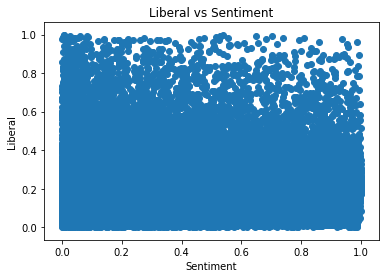

In [15]:
plt.scatter(sentiment, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




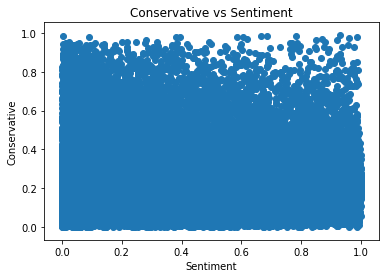

In [16]:
plt.scatter(sentiment, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


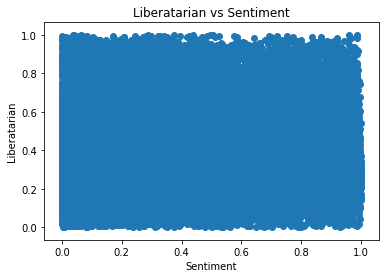

In [17]:
plt.scatter(sentiment, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


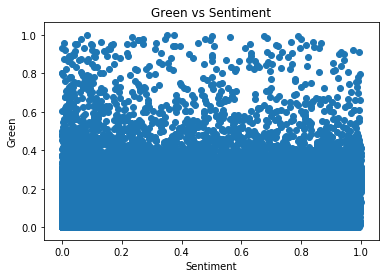

In [20]:
plt.scatter(sentiment, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


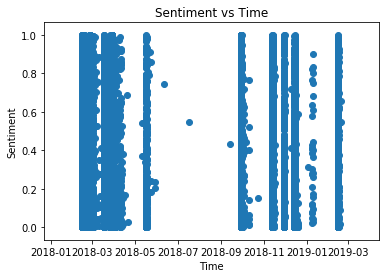

In [25]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

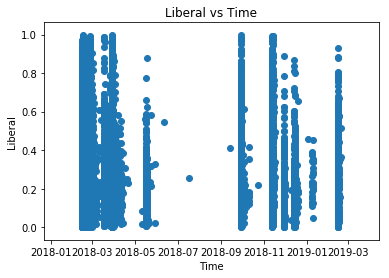

In [26]:
plt.scatter(time, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

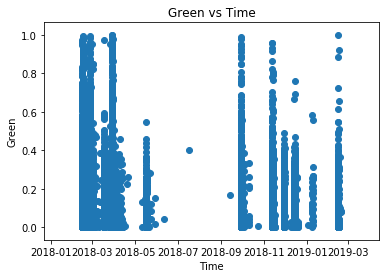

In [27]:
plt.scatter(time, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

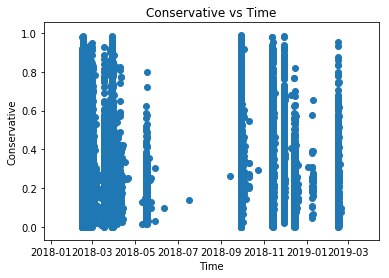

In [28]:
plt.scatter(time, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

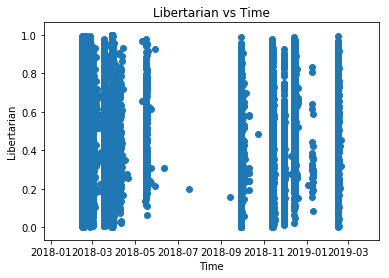

In [29]:
plt.scatter(time, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')

plt.show()

In [80]:
x = {'Sentiment':sentiment,'Time':time}

import pandas as pd
df = pd.DataFrame(x)



In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='numank', api_key='E5NjgyAxT2azZXX97hnk')

In [61]:
# Sentiment VS Time

traceSentimentTime = go.Scatter(
    x = time,
    y = sentiment,
    mode = 'markers'
)

sentimentVStime = [traceSentimentTime]
py.iplot(sentimentVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [68]:
# Conservative VS Time

traceConservativeTime = go.Scatter(
    x = time,
    y = conservative,
    mode = 'markers'
)

conservativeVStime = [traceConservativeTime]
py.iplot(conservativeVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [69]:
# Green VS Time

traceGreenTime = go.Scatter(
    x = time,
    y = green,
    mode = 'markers'
)

greenVStime = [traceGreenTime]
py.iplot(greenVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [70]:
# Liberal VS Time

traceLiberalTime = go.Scatter(
    x = time,
    y = liberal,
    mode = 'markers'
)

liberalVStime = [traceLiberalTime]
py.iplot(liberalVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [74]:
# Libertarian VS Time

traceLibertarianTime = go.Scatter(
    x = time,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]
py.iplot(libertarianVSsentiment, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [72]:
# Liberatarian VS Sentiment

traceLibertarianTime = go.Scatter(
    x = sentiment,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]

# Plot and embed in ipython notebook!
py.iplot(libertarianVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [67]:
# Conservative VS Sentiment

traceSentimentConservative = go.Scatter(
    x = sentiment,
    y = conservative,
    mode = 'markers'
)

conservativeVSsentiment = [traceSentimentConservative]

# Plot and embed in ipython notebook!
py.iplot(conservativeVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [78]:
# Liberal VS Sentiment

traceSentimentLiberal = go.Scatter(
    x = sentiment,
    y = liberal,
    mode = 'markers'
)

liberalVSsentiment = [traceSentimentLiberal]

# Plot and embed in ipython notebook!
py.iplot(liberalVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [79]:
# Green VS Sentiment

traceSentimentGreen = go.Scatter(
    x = sentiment,
    y = green,
    mode = 'markers'
)

greenVSsentiment = [traceSentimentGreen]

# Plot and embed in ipython notebook!
py.iplot(greenVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'
